Regularization is a technique used in machine learning to prevent overfitting, which otherwise causes models to perform poorly on unseen data. By adding a penalty for complexity, regularization encourages simpler and more generalizable models.

  - Prevents overfitting: Adds constraints to the model to reduce the risk of memorizing noise in the training data.

   - Improves generalization: Encourages simpler models that perform better on new, unseen data.  
    

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet

In [67]:
housing = fetch_california_housing()

In [68]:
housing_data = pd.DataFrame(housing.data, columns = housing.feature_names)
housing_data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [69]:
housing_target = pd.DataFrame(housing.target, columns = housing.target_names)
housing_target.head(5)

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [70]:
X_train, X_test, y_train, y_test = train_test_split(housing_data, housing_target, test_size = 0.3, random_state = 42)

### L1 Regularization (Lasso)

The L1-norm is calculated as the sum of the absolute values of the coefficients.

L1_penalty = lambda * sum(abs(coefficients))

L1 regularization tends to create sparser models, meaning some coefficients will be exactly zero, effectively removing certain features from the model. This can be useful for feature selection, especially when there are many irrelevant features or when interpretability is important.

In [71]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [72]:
# Number of features seen during fit
lasso.n_features_in_

8

In [73]:
# Sparse representation of the fitted coef_
lasso.sparse_coef_

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 8)>

In [74]:
# Parameter vector (w in the cost function formula)
lasso.coef_

array([ 1.47239531e-01,  5.95719362e-03,  0.00000000e+00, -0.00000000e+00,
       -5.59966868e-06, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

L1 sets the coefficients of irrelevant features to zero

### L2 Regularization (Ridge)

The L2-norm is calculated as the square root of the sum of the squares of the coefficients.

L2_penalty = lambda * sum(coefficients ^ 2)

L2 regularization tends to create models with smaller coefficients but does not force them to be exactly zero. This results in a more balanced model that still considers all features but with reduced importance.

In [75]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [76]:
ridge.n_features_in_

8

In [77]:
ridge.coef_

array([ 4.45640287e-01,  9.68390676e-03, -1.21748570e-01,  7.76670465e-01,
       -7.70447401e-07, -3.36949165e-03, -4.18529602e-01, -4.33656145e-01])

L2 reduces the impact of every feature but won’t completely remove any.

### Elastic Net Regularization

It uses both the L1-norm and the L2-norm as penalty terms, with a mixing parameter (alpha) to control the balance between the two.

ElasticNet_penalty = alpha * L1_penalty + (1 - alpha) * L2_penalty

Provide a balance between the sparsity of L1 regularization and the smoothness of L2 regularization, making it a useful option when it’s unclear which regularization technique to use.

In [78]:
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

ElasticNet()

In [79]:
elastic_net.n_features_in_

8

In [80]:
elastic_net.sparse_coef_

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 8)>

In [81]:
elastic_net.coef_

array([ 2.54190726e-01,  1.13748411e-02,  0.00000000e+00, -0.00000000e+00,
        1.00680042e-05, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

Elastic net removes one of the similar features and shrinks the other.

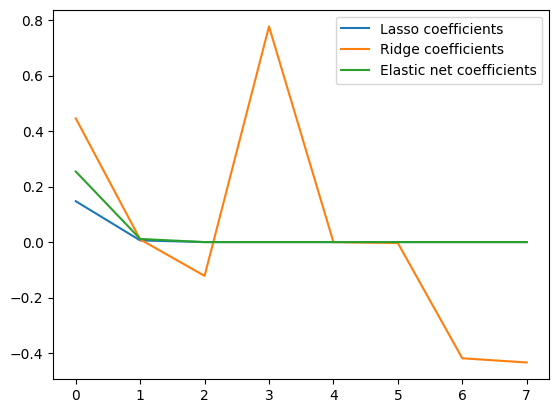

In [82]:
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(ridge.coef_, label='Ridge coefficients')
plt.plot(elastic_net.coef_, label='Elastic net coefficients')
plt.legend(loc='best')
plt.show()